## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Import dataset

In [5]:
data = pd.read_csv("heart.csv")

## First 5 rows of dataset

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## last five rows of dataset

In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Shape of dataset (number of rows and columns)

In [8]:
data.shape

(1025, 14)

# check null values in dataset

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## check dupliccate data and drop them

In [16]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [18]:
data = data.drop_duplicates()

In [19]:
data.shape
## after dropping duplicate values we have 302 rows and 14 columns 

(302, 14)

### How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [21]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

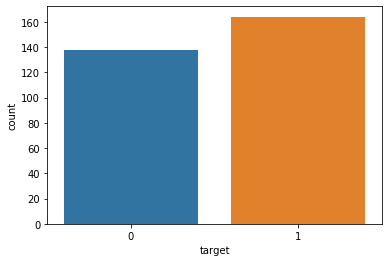

In [25]:
sns.countplot(data['target'])
plt.show()

## Find Count of  Male & Female in this Dataset

In [26]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

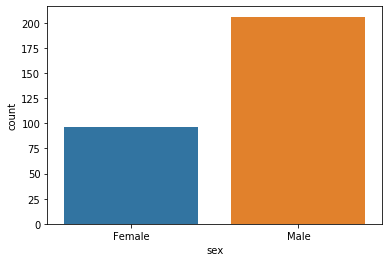

In [31]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

# Find Gender Distribution According to The Target Variable

In [32]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

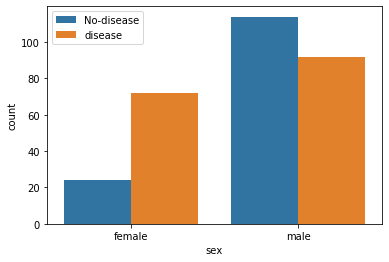

In [36]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['male','female'])
plt.legend(labels=['No-disease','disease'])
plt.show()

## Check Age Distribution In The Dataset

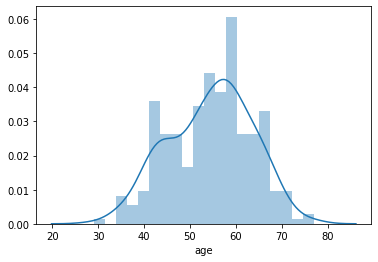

In [38]:
sns.distplot(data['age'],bins=20)
plt.show()

## Check Chest Pain Type

#####    .Chest pain type(4 values)
#####    .value 0: Typical angina
#####    .Value 1: Atypical angina
#####    .Value 2: Non-anginal pain
#####    .Value 3: Asymtomatic

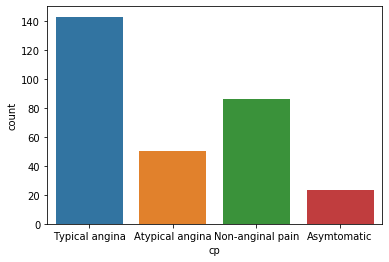

In [40]:
sns.countplot(data['cp'])
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymtomatic'])
plt.show()

## Show The Chest Pain Distribution As Per Target Variable

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

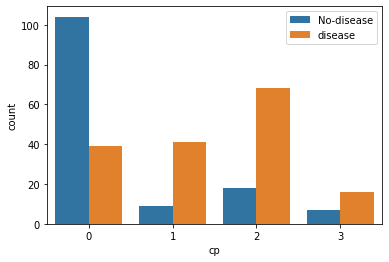

In [44]:
sns.countplot(x="cp",hue="target",data=data)
plt.legend(labels=['No-disease','disease'])
plt.show()

## Show Fasting Blood Sugar Distribution According To Target Variable

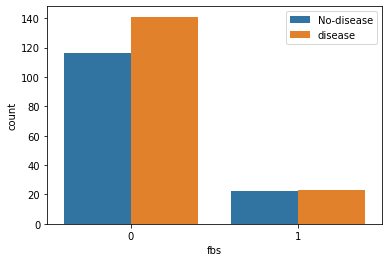

In [45]:
sns.countplot(x="fbs",hue="target",data=data)
plt.legend(labels=['No-disease','disease'])
plt.show()

## Check Resting Blood Pressure Distribution

In [46]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

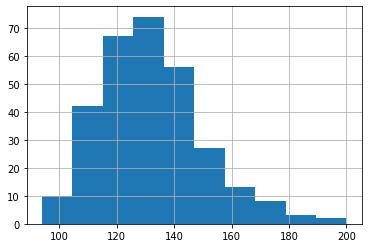

In [48]:
data["trestbps"].hist()
plt.show()

## Show Distribution of Serum cholesterol

In [49]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

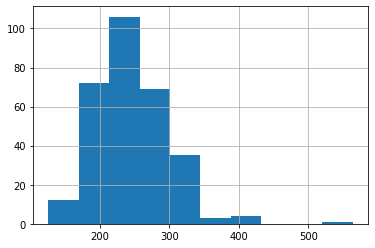

In [50]:
data["chol"].hist()
plt.show()

## Plot Continuous Variables

In [59]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [60]:
categorical_values = list(data.columns)

In [61]:
print(list(enumerate(categorical_values, 1)))

[(1, 'age'), (2, 'sex'), (3, 'cp'), (4, 'trestbps'), (5, 'chol'), (6, 'fbs'), (7, 'restecg'), (8, 'thalach'), (9, 'exang'), (10, 'oldpeak'), (11, 'slope'), (12, 'ca'), (13, 'thal'), (14, 'target')]


In [62]:
print(categorical_values)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


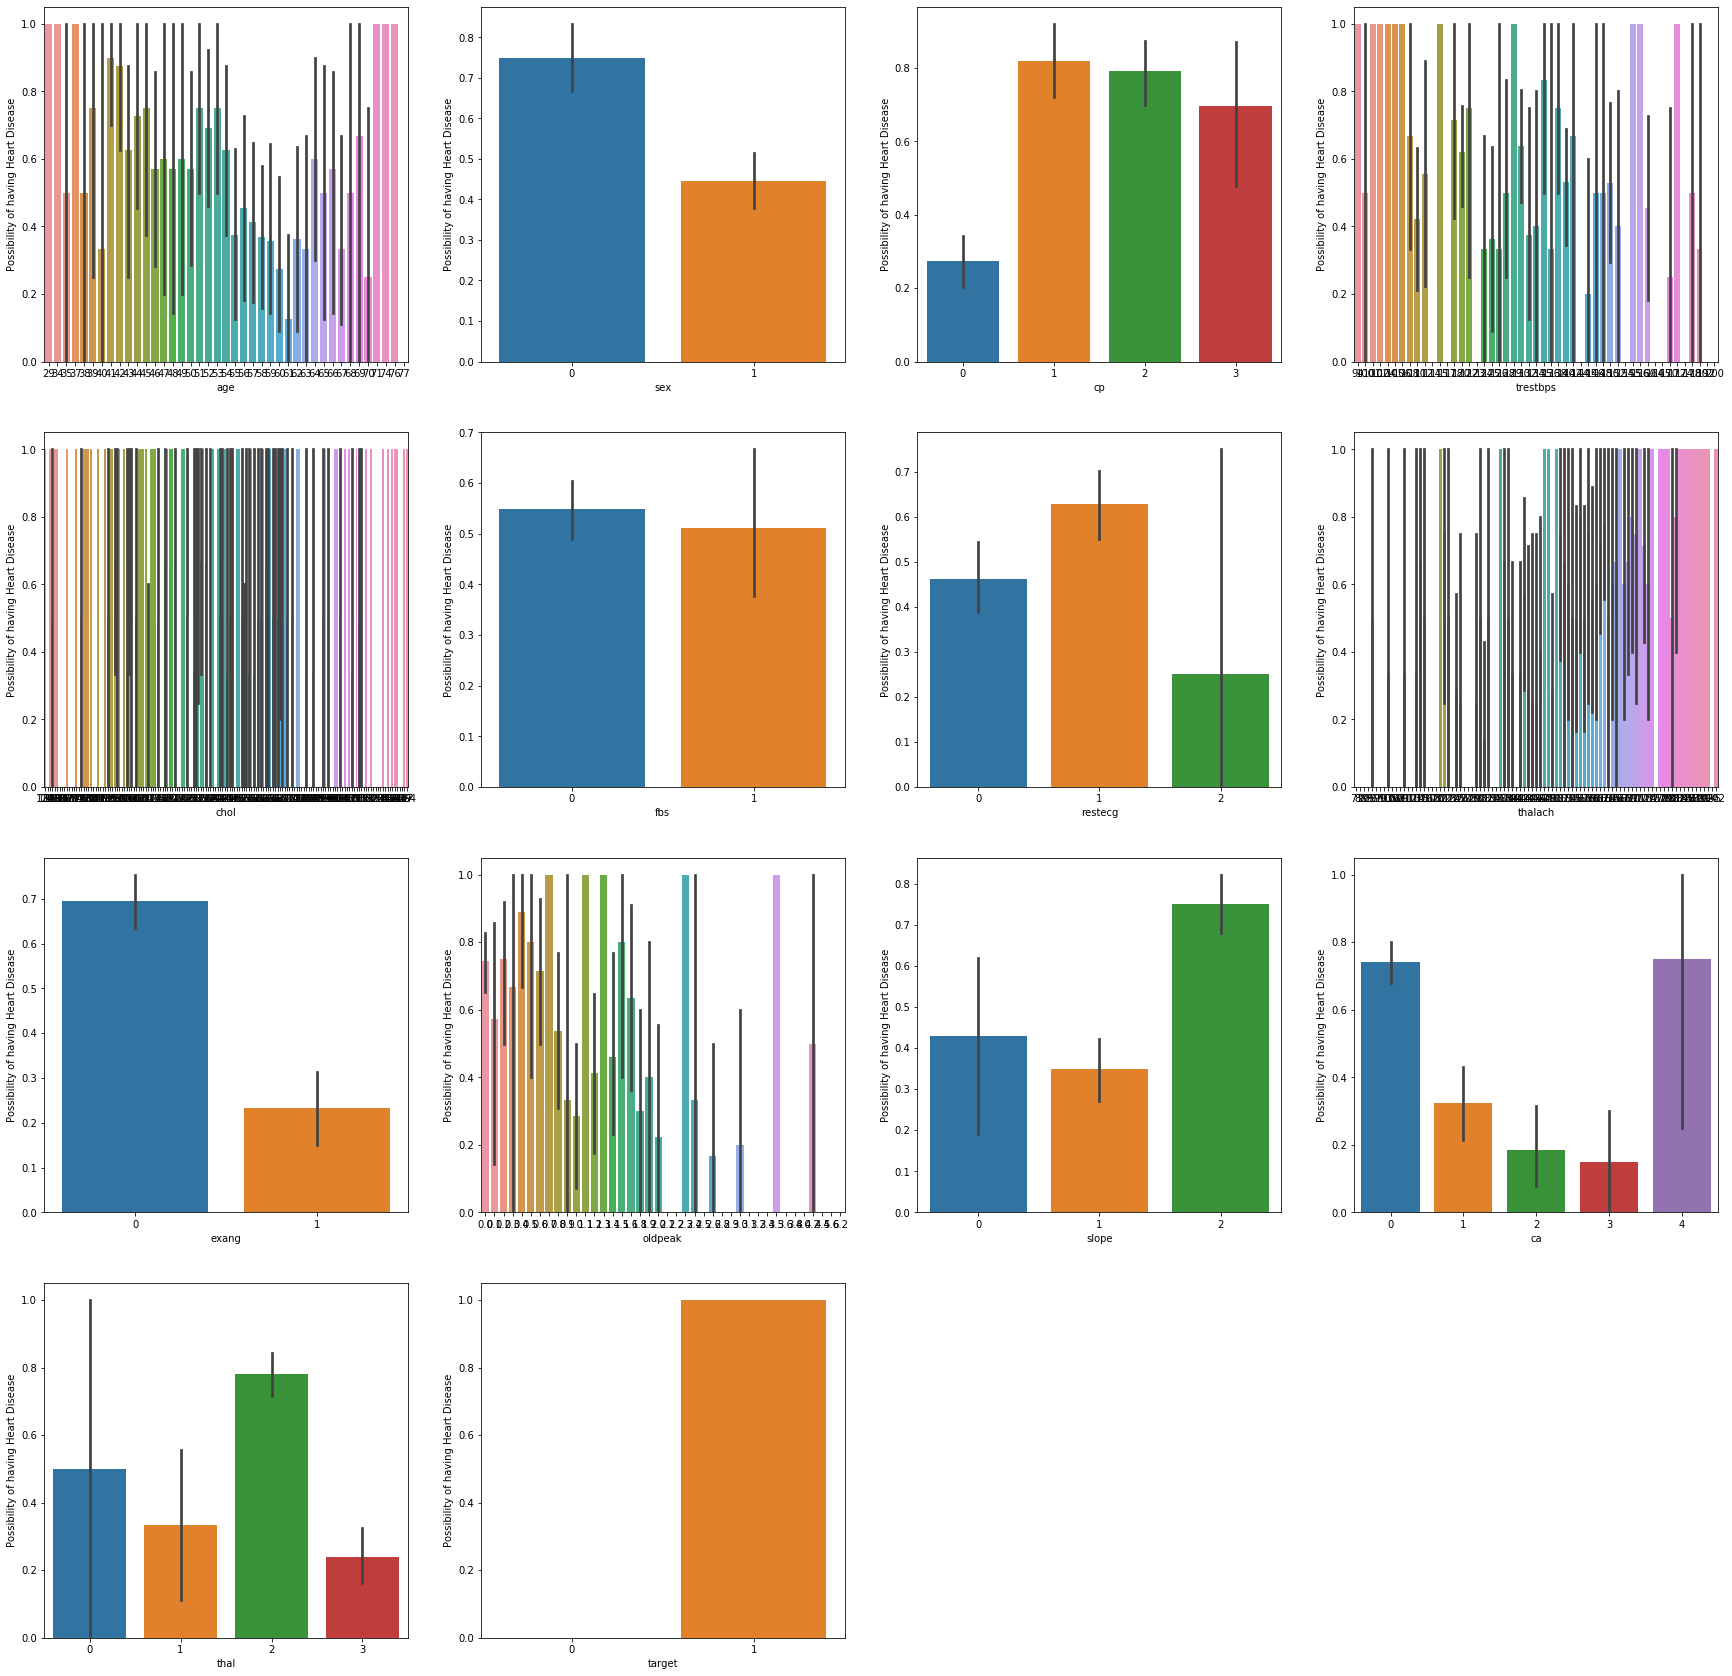

In [63]:
plt.figure(figsize=(30,30))

for i, col in enumerate(categorical_values, 1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}",y='target', data=data)
    plt.ylabel("Possibility of having Heart Disease")
    plt.xlabel(f"{col}")

# Confusion matrics

In [7]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

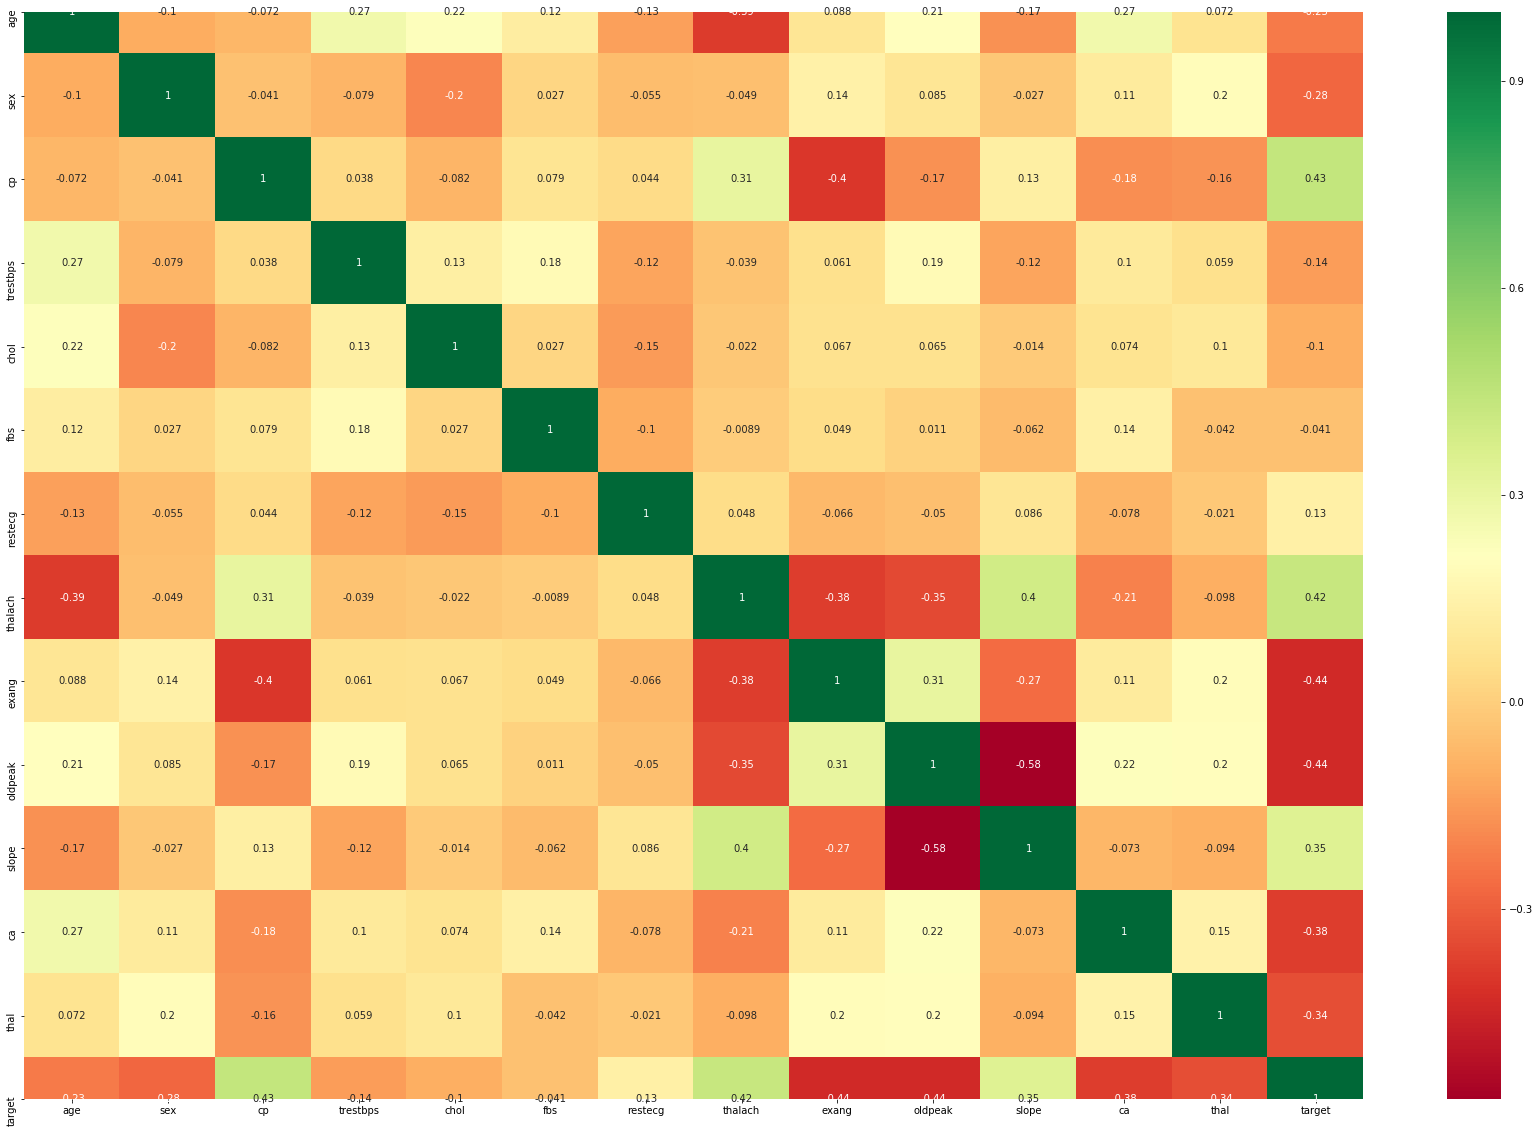

In [6]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

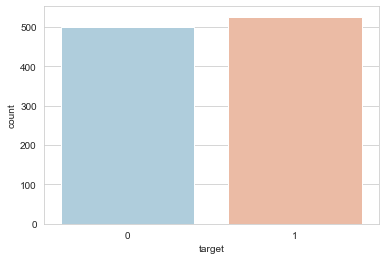

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')
plt.show()